# Задача 4.1

In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n = 1000
m = 100

In [8]:
s = np.arange(1, n + 1)

In [3]:
def find_average_g(sample, theta):
    s = np.arange(1, n + 1)
    first = np.eye(m, n)
    second = np.eye(m, n)
    third = np.eye(m, n)
    fourth = np.eye(m, n)
    for i in range(m):
        first[i] =  2 * sample[i].cumsum() / s
    for j in range(m):
        max_in_array = sample[j][0]
        min_in_array = sample[j][0]
        for i in range(n):
            max_in_array = max(max_in_array, sample[j][i])
            min_in_array = min(min_in_array, sample[j][i])
            second[j][i] = (i + 2) * min_in_array
            third[j][i] = max_in_array + min_in_array
            fourth[j][i] = (float) (i + 2) / (i + 1) * max_in_array
    g_1 = (first - theta) ** 2
    g_2 = (second - theta) ** 2
    g_3 = (third - theta) ** 2
    g_4 = (fourth - theta) ** 2
    average_g = np.eye(4, n)
    for i in range(n):
        average_g[0][i] = g_1[:, i].mean()
        average_g[1][i] = g_2[:, i].mean()
        average_g[2][i] = g_3[:, i].mean()
        average_g[3][i] = g_4[:, i].mean()
    return average_g

# $\theta = 1   $

In [4]:
theta = 1

Сгенерируем m выборок из равномерного распределения на отрезке $[0, \theta]$:

In [5]:
sample = np.eye(m, n)
for i in range(m):
    sample[i] = sps.uniform.rvs(loc = 0, scale = theta, size = n)

Для каждой выборки посчитаем оценки 2$\overline{X}$, ${(n + 1)}X_{(1)}$, $ X_{(1)} + X_{(n)}$, $\frac{n+1}{n}X_{(n)}$, найдем среднеквадратичную функцию потерь $g\left(\widehat{\theta}, \theta\right) = \left(\widehat{\theta} - \theta \right)^2$ и усредним по выборкам для каждого фиксированного значения n:

In [6]:
average_g = find_average_g(sample, 1)

Построим график зависимости усредненного $g(n)$ для всех оценок:

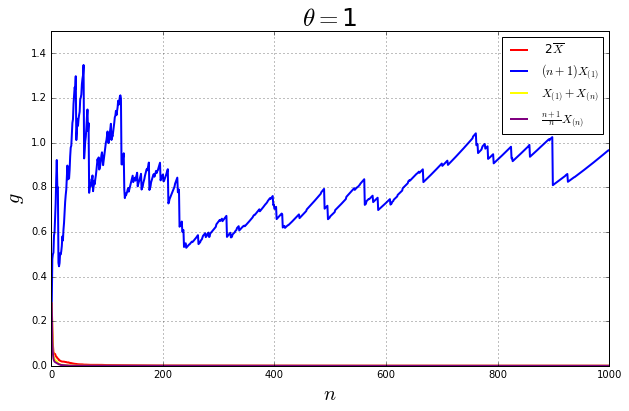

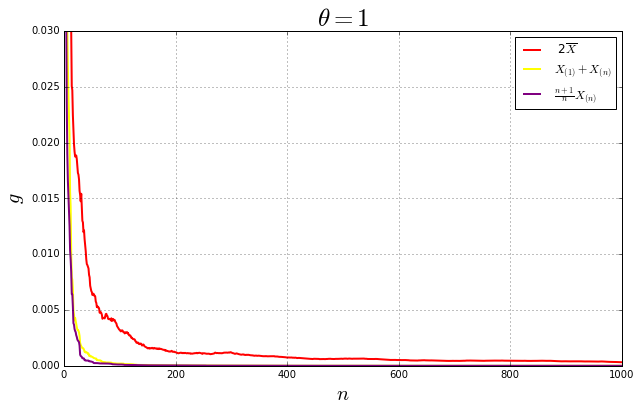

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(s, average_g[0], color='red', linewidth=2, label=' 2$\overline{X}$')
plt.plot(s, average_g[1], color='blue', linewidth=2, label='${(n + 1)}X_{(1)}$')
plt.plot(s, average_g[2], color='yellow', linewidth=2, label='$ X_{(1)} + X_{(n)}$')
plt.plot(s, average_g[3], color='purple', linewidth=2, label=r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 1.5))
plt.xlabel('$n$', fontsize = 20)
plt.ylabel('$g$', fontsize = 20)
plt.title(r'$\theta = $'+ str(theta), fontsize = 25)
plt.grid() 

plt.figure(figsize=(10, 6))
plt.plot(s, average_g[0], color='red', linewidth=2, label=' 2$\overline{X}$')
plt.plot(s, average_g[2], color='yellow', linewidth=2, label='$ X_{(1)} + X_{(n)}$')
plt.plot(s, average_g[3], color='purple', linewidth=2, label=r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 0.03))
plt.xlabel('$n$', fontsize = 20)
plt.ylabel('$g$', fontsize = 20)
plt.title(r'$\theta = 1$', fontsize = 25)
plt.grid() 

plt.show()

# $\theta = 10   $

In [10]:
theta = 10
sample = np.eye(m, n)
for i in range(m):
    sample[i] = sps.uniform.rvs(loc = 0, scale = theta, size = n)

In [11]:
average_g = find_average_g(sample, theta)

График зависимости $g(n)$:

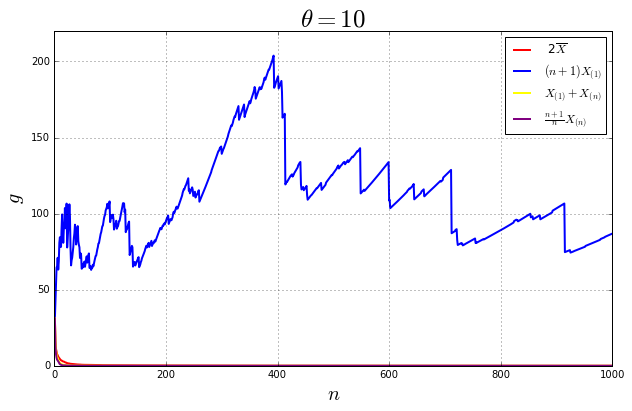

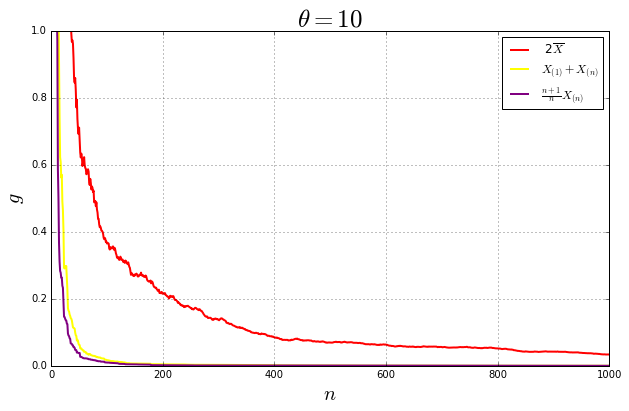

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(s, average_g[0], color='red', linewidth=2, label=' 2$\overline{X}$')
plt.plot(s, average_g[1], color='blue', linewidth=2, label='${(n + 1)}X_{(1)}$')
plt.plot(s, average_g[2], color='yellow', linewidth=2, label='$ X_{(1)} + X_{(n)}$')
plt.plot(s, average_g[3], color='purple', linewidth=2, label=r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 220))
plt.xlabel('$n$', fontsize = 20)
plt.ylabel('$g$', fontsize = 20)
plt.title(r'$\theta = 10$', fontsize = 25)
plt.grid() 

plt.figure(figsize=(10, 6))
plt.plot(s, average_g[0], color='red', linewidth=2, label=' 2$\overline{X}$')
plt.plot(s, average_g[2], color='yellow', linewidth=2, label='$ X_{(1)} + X_{(n)}$')
plt.plot(s, average_g[3], color='purple', linewidth=2, label=r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 1))
plt.xlabel('$n$', fontsize = 20)
plt.ylabel('$g$', fontsize = 20)
plt.title(r'$\theta = 10$', fontsize = 25)
plt.grid() 

plt.show()

# $\theta = 25   $

In [13]:
theta = 25
sample = np.eye(m, n)
for i in range(m):
    sample[i] = sps.uniform.rvs(loc = 0, scale = theta, size = n)

In [14]:
average_g = find_average_g(sample, theta)

График зависимости $g(n)$:

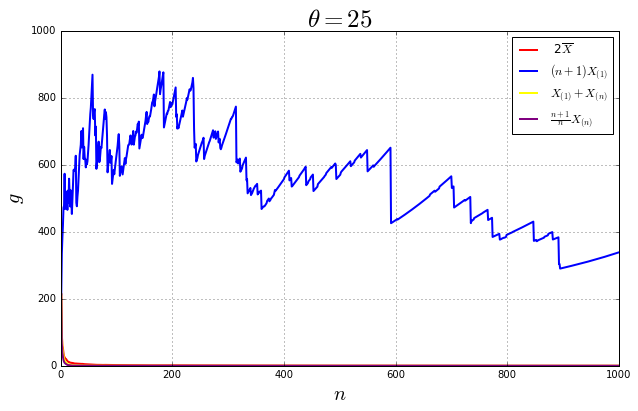

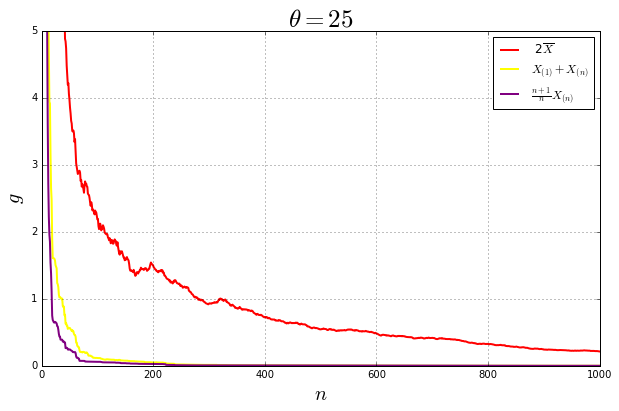

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(s, average_g[0], color='red', linewidth=2, label=' 2$\overline{X}$')
plt.plot(s, average_g[1], color='blue', linewidth=2, label='${(n + 1)}X_{(1)}$')
plt.plot(s, average_g[2], color='yellow', linewidth=2, label='$ X_{(1)} + X_{(n)}$')
plt.plot(s, average_g[3], color='purple', linewidth=2, label=r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 1000))
plt.xlabel('$n$', fontsize = 20)
plt.ylabel('$g$', fontsize = 20)
plt.title(r'$\theta = 25$', fontsize = 25)
plt.grid() 

plt.figure(figsize=(10, 6))
plt.plot(s, average_g[0], color='red', linewidth=2, label=' 2$\overline{X}$')
plt.plot(s, average_g[2], color='yellow', linewidth=2, label='$ X_{(1)} + X_{(n)}$')
plt.plot(s, average_g[3], color='purple', linewidth=2, label=r'$\frac{n+1}{n}X_{(n)}$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 5))
plt.xlabel('$n$', fontsize = 20)
plt.ylabel('$g$', fontsize = 20)
plt.title(r'$\theta = 25$', fontsize = 25)
plt.grid() 

plt.show()

Из графиков видно, что при любом значении $\theta  $ функция потерь оценки ${(n + 1)}X_{(1)}$ сильно отличается от нуля. Это оценка единственная является несостоятельной. Из теоретической задачи 1, в равномерном подходе с квадратичной функцией потерь оценка $\frac{n+1}{n}X_{(n)}$ лучше двух других, оценка $2\overline{X}$ лучше ${(n + 1)}X_{(1)}$. 
Функция риска оценок:
$$R\left(\frac{n+1}{n}X_{(n)}, \theta\right) = \frac{\theta^2}{n(n + 2)}$$
$$R\left(2\overline{X}, \theta\right) = \frac{\theta^2}{3n}$$
$$R\left({(n + 1)}X_{(1)}, \theta\right) = \frac{n\theta^2}{n + 2}$$
И для любых $n \geq 1  $ :
$$\frac{\theta^2}{n(n + 2)} \leq \frac{\theta^2}{3n} \leq \frac{n\theta^2}{n + 2}$$
$$R\left(\frac{n+1}{n}X_{(n)}, \theta\right) \leq R\left(2\overline{X}, \theta\right) \leq R\left({(n + 1)}X_{(1)}, \theta\right)$$
Найдем функцию риска для оценки $ X_{(1)} + X_{(n)}  $. Эта оценка несмещённая, значит функция риска равна дисперсии оценки. min и max - борелевские функции, следовательно,  $ X_{(1)} $ и $ X_{(n)}$ - борелевские функции от независимых случайных величин - независимы, и дисперсия их суммы равна сумме дисперсий:
$$R\left(X_{(1)} + X_{(n)}, \theta\right) = D_\theta \left(X_{(1)} + X_{(n)}\right) =  D_\theta X_{(1)} + D_\theta X_{(n)}$$
$$D_\theta X_{(1)} = E_\theta X_{(1)}^2 - (E_\theta X_{(1)})^2 = \frac{2\theta^2}{(n + 1)(n + 2)} - \left(\frac{\theta}{n + 1}\right)^2 = \frac{\theta^2}{(n + 1)^2(n + 2)}(2n + 2 - n - 2) = \frac{n\theta^2}{(n + 1)^2(n + 2)}$$
$$D_\theta X_{(n)} = E_\theta X_{(n)}^2 - (E_\theta X_{(n)})^2 = \frac{n\theta^2}{n + 2} - \left(\frac{n\theta}{n + 1}\right)^2 = n\theta^2 \left(\frac{n^2 + 2n + 1 - n^2 - 2n}{(n + 1)^2(n + 2)}\right) = \frac{n\theta^2}{(n + 1)^2(n + 2)}$$
Получаем функцию риска:
$$R\left(X_{(1)} + X_{(n)}, \theta\right) = \frac{2n\theta^2}{(n + 1)^2(n + 2)}$$
Заметим, что при $n \geq 3$:
$$\frac{\theta^2}{n(n + 2)} \leq \frac{2n\theta^2}{(n + 1)^2(n + 2)} \leq \frac{\theta^2}{3n} \leq \frac{n\theta^2}{n + 2}$$
$$R\left(\frac{n+1}{n}X_{(n)}, \theta\right) \leq R\left(X_{(1)} + X_{(n)}, \theta\right) \leq R\left(2\overline{X}, \theta\right) \leq R\left({(n + 1)}X_{(1)}, \theta\right)$$
Из графиков видно, что при любых значениях $\theta$ значение усредненной функции потерь $g$ при одном и том же $n$ меньше у тех оценок, которые лучше. При увеличении $\theta $ при фиксированном $n$ значение g для каждой оценки увеличится.